# Prepare data

In [1]:
import pandas as pd
# Preparing the data MATH Version

df_1 = pd.read_csv("../data/station_40.csv")
df_2 = pd.read_csv("../data/station_49.csv")
df_3 = pd.read_csv("../data/station_63.csv")
df_4 = pd.read_csv("../data/station_80.csv")

# col1 = [col + '_1' for col in df_1.columns]
# col2 = [col + '_2' for col in df_2.columns]
# col3 = [col + '_3' for col in df_3.columns]
# col4 = [col + '_4' for col in df_4.columns]
# col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

# df_1.columns = col1
# df_2.columns = col2
# df_3.columns = col3
# df_4.columns = col4

df_1.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_2.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_3.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_4.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

# df_1.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)


/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_2856/1467189060.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'W_14_1_x', 'W_11_1_x', 'W_13_1_x', 'W_2_1_x', 'W_10_1_x', 'W_15_1_x', 'W_3_1_x', 'YIELD_1_x', 'W_1_1_x', 'W_8_1_x', 'W_6_1_x', 'W_16_1_x', 'W_17_1_x', 'W_5_1_x', 'W_7_1_x', 'W_4_1_x', 'W_9_1_x', 'W_18_1_x', 'W_12_1_x'} in the result is deprecated and will raise a MergeError in a future version.
  full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")


,YEAR,W_1_1_x,W_2_1_x,W_3_1_x,W_4_1_x,W_5_1_x,W_6_1_x,W_7_1_x,W_8_1_x,W_9_1_x,...,W_10_1_y,W_11_1_y,W_12_1_y,W_13_1_y,W_14_1_y,W_15_1_y,W_16_1_y,W_17_1_y,W_18_1_y,YIELD_1_y
0,0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,...,1.027391,1.228816,1.324273,2.309497,2.917570,0.769869,0.907157,3.401885,1.037317,10.51
1,1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,...,0.143191,0.925005,2.751680,1.196560,0.784046,1.505209,0.240757,1.617603,1.818209,6.61
2,2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,...,0.942601,1.811827,2.923051,0.384716,2.876004,1.535451,1.509938,1.652338,0.279352,6.86
3,3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,...,3.640015,0.956474,2.241502,1.893830,0.189264,2.049275,3.795690,0.404447,1.468172,5.32
4,4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,...,1.191167,0.049557,0.330440,2.860207,0.399063,0.506497,1.700047,0.216837,2.166599,6.32


In [2]:
import pandas as pd

# Importing the relevant csv files
station_40 = pd.read_csv("../data/station_40.csv")
station_49 = pd.read_csv("../data/station_49.csv")
station_63 = pd.read_csv("../data/station_63.csv")
station_80 = pd.read_csv("../data/station_80.csv")
dfs = [station_49, station_80, station_40, station_63]

# Selected Q values for the challenge
Q = [3.3241, 5.1292, 6.4897, 7.1301]

# Function putting the conditions on the rows
def select_subset(row, Qi):
    return row['W_13'] + row['W_14'] + row['W_15'] <= Qi

# Create a column "subset", which is True if the subset conditions are met
for i, df in enumerate(dfs):
    df['subset'] = df.apply(select_subset, Qi=Q[i], axis=1)

# Find the years where the conditions are met for each station
years_per_station = [set(df.loc[df['subset'], 'YEAR']) for df in dfs]

# Find the intersection of years for all stations
common_years = set.intersection(*years_per_station)

# Select the yields of each common_years and create a dataframe out of it
yield_data = {'YEAR': list(common_years)}
for i, df in enumerate(dfs):
    yield_data[f'YIELD_{i+1}'] = df.loc[df['YEAR'].isin(common_years), 'YIELD'].tolist()
    for j in range(13, 16):
        yield_data[f'W{j}_{i+1}'] = df.loc[df['YEAR'].isin(common_years), f'W_{j}'].tolist()

yield_df = pd.DataFrame(yield_data)

# yield_df.to_csv('CSVs/yields_subset_full.csv')

In [ ]:
station_40 = pd.read_csv("../data/station_40.csv")
station_49 = pd.read_csv("../data/station_49.csv")
station_63 = pd.read_csv("../data/station_63.csv")
station_80 = pd.read_csv("../data/station_80.csv")
dfs = [station_49, station_80, station_40, station_63]

In [127]:
def sum_R(row):
    return (row['W_13'] + row['W_14'] + row['W_15']) / 3

def sum_T(row):
    return row[1:10].mean()

# for i, df in enumerate(dfs):
#     df[f'T{i}'] = df.apply(sum_T, axis=1)
#     df[f'R{i}'] = df.apply(sum_R, axis=1)

# # Select the yields of each common_years and create a dataframe out of it
scenario_df = {'YEAR': range(len(dfs[0]))}
# for i, df in enumerate(dfs):
#     scenario_df[f'R{i}'] = df[f'R{i}']
#     scenario_df[f'T{i}'] = df[f'T{i}']
for i, df in enumerate(dfs):
    scenario_df[f'R{i}'] = df.apply(sum_R, axis=1)
    scenario_df[f'T{i}'] = df.apply(sum_T, axis=1)

scenario_df = pd.DataFrame(scenario_df)

scenario_df['R'] = scenario_df[['R0', 'R1', 'R2', 'R3']].mean(axis=1)
scenario_df['T'] = scenario_df[['T0', 'T1', 'T2', 'T3']].mean(axis=1)

scenario_df=scenario_df[['R', 'T']]

In [108]:
import numpy as np

def subset_scenario(df:pd.DataFrame, i:int):
    R1 = [-np.inf, 1.8]
    R2 = [1.8, 2.2]
    R3 = [2.2, np.inf]
    T1 = [-np.inf, 21.2]
    T2 = [21.2, 22]
    T3 = [22, np.inf]
    scenario = {
        "1":{"R":R1, "T":T1},
        "2":{"R":R1, "T":T2},
        "3":{"R":R1, "T":T3},
        "4":{"R":R2, "T":T1},
        "5":{"R":R2, "T":T2},
        "6":{"R":R2, "T":T3},
        "7":{"R":R3, "T":T1},
        "8":{"R":R3, "T":T2},
        "9":{"R":R3, "T":T3},
    }
    
    Rmin, Rmax = scenario[f'{i}']['R']
    Tmin, Tmax = scenario[f'{i}']['T'] 
    
    selector = (df['R'] > Rmin) & (df['R'] <= Rmax) & (df['T'] > Tmin) & (df['T'] <= Tmax)
    filtered_df = df[selector]

    return filtered_df

In [130]:
sc1 = subset_scenario(scenario_df, 1)

station_40.merge(sc1, how='inner', left_index=True, right_index=True)

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_14,W_15,W_16,W_17,W_18,YIELD,R2,T2,R,T
19,19,20.193555,24.168292,20.808746,25.818308,26.065538,24.942540,22.543139,21.697979,21.700287,...,0.501634,3.443753,3.612431,4.313942,6.744895,14.15,2.715718,23.104265,1.656016,20.214486
34,34,18.714398,18.483311,21.764326,23.462215,26.823104,27.744254,27.463992,24.665481,19.645094,...,1.831638,2.208611,3.001429,1.687746,3.688882,11.08,2.362908,23.196242,1.704576,20.693984
60,60,18.125372,22.141866,26.143340,27.521284,25.491673,28.297008,23.713829,23.580071,19.563685,...,2.365801,0.591284,2.687811,4.548575,3.096317,7.63,1.141153,23.842014,1.571121,21.141664
63,63,17.864394,22.272327,21.784558,24.664581,25.903168,26.223161,25.428740,25.422607,18.075196,...,1.163491,0.860401,3.939088,2.686804,3.962076,10.14,1.520462,23.070970,1.697597,20.499037
83,83,19.051027,21.201198,21.906853,27.331839,27.410875,24.901527,23.219233,25.078325,18.276974,...,1.588973,3.630925,3.415167,4.535410,5.383105,7.92,2.063509,23.153095,1.736981,20.371150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,9901,21.529653,22.227778,23.847248,27.377615,25.045848,25.445442,22.879877,22.641731,21.098990,...,0.893487,1.411851,1.513220,1.992347,6.132082,9.27,1.354732,23.566020,1.679314,21.003241
9911,9911,17.079652,21.389161,23.199238,25.389027,26.108970,29.454452,24.595661,24.285690,19.856639,...,0.711467,0.430531,4.701994,2.205944,7.523258,8.22,2.063573,23.484277,1.237850,21.078263
9982,9982,16.387694,21.435764,21.653236,24.744430,29.093761,26.829943,26.974755,23.672949,21.684756,...,1.327731,1.228722,1.012908,2.445195,7.379315,9.22,1.364120,23.608587,1.405345,20.987302
9986,9986,19.164874,24.358279,24.047223,23.494875,24.780565,26.819408,25.563987,22.601219,21.001386,...,2.892632,2.125932,1.656397,5.811266,6.171544,12.24,2.200006,23.536868,1.752650,20.903302


In [136]:
import sys
sys.path.append('../')
from scenario import get_scenario

test = get_scenario(1)

In [137]:
test[0]

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD,R,T
19,19,18.476308,23.817124,20.674186,24.532081,24.538233,24.059399,20.786797,20.047547,17.761069,...,1.882242,0.455027,1.250127,0.182744,2.901473,2.081361,2.080674,4.14,1.656016,20.214486
34,34,17.551278,18.332946,20.427173,23.673247,27.419524,27.465407,26.604432,22.851546,17.568044,...,1.133080,0.893728,0.042826,0.759109,1.333245,1.559959,1.164207,3.74,1.704576,20.693984
60,60,16.371976,20.685583,26.106958,27.942493,24.940137,28.198224,22.421124,22.178844,16.380707,...,1.316939,0.296521,1.047850,0.555946,2.500013,0.313765,1.698412,4.52,1.571121,21.141664
63,63,16.288702,20.956192,21.899313,24.420679,25.120857,25.121803,23.767839,22.577199,15.801733,...,1.669846,1.597490,2.391435,0.250845,2.254629,2.360824,1.559382,6.75,1.697597,20.499037
83,83,17.682848,20.138859,21.627761,26.758458,28.258324,23.577831,21.152038,22.010505,15.522964,...,1.647851,1.052453,1.493355,1.035515,2.258048,1.335619,3.006376,7.17,1.736981,20.371150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,9901,20.548314,21.550471,23.475104,27.707938,24.417285,23.434765,21.320479,20.283789,17.867473,...,2.044422,2.349402,0.213204,1.088904,0.829455,0.531750,1.691813,4.41,1.679314,21.003241
9911,9911,15.722764,20.589902,22.537174,25.554535,25.750910,31.323294,23.695815,23.103860,16.179540,...,2.840667,0.267777,1.217064,0.020744,3.130858,0.294607,3.793891,5.40,1.237850,21.078263
9982,9982,15.366417,21.285243,20.756372,25.006786,29.519730,26.549370,25.159052,20.973938,18.140168,...,2.740478,0.405960,0.749298,0.156631,0.696517,2.927454,3.230091,6.34,1.405345,20.987302
9986,9986,17.979879,23.856752,23.316355,22.573186,24.384860,26.531387,24.555355,20.032020,17.823074,...,1.777562,0.668692,0.590177,1.710277,0.526174,2.909663,2.142059,4.51,1.752650,20.903302


In [126]:
import os
os.path.join("../data/", "station_40.csv")

'../data/station_40.csv'

In [118]:
for i in range(1,10):
    a = subset_scenario(scenario_df, i).shape[0]
    print(a)

464
1290
1678
534
1254
1082
1007
1690
1001


In [62]:
dfs[0]['R0']

0        3.380908
1        2.854533
2        1.335289
3        5.120680
4        5.519273
          ...    
9995     3.011101
9996     1.407260
9997     1.317009
9998    10.060905
9999     2.913160
Name: R0, Length: 10000, dtype: float64

# GMM Model

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import ot
from joblib import dump, load


yields_true = pd.read_csv('../CSVs/yields_subset.csv').iloc[:, 2:]
gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(yields_true)
dump(gm, '../parameters/gmm.joblib')

noise = np.load('../data/noise.npy')[:, :4]

loaded_model = load('../parameters/gmm.joblib')

weights = loaded_model.weights_
means = loaded_model.means_
covariances = loaded_model.covariances_

simul = np.zeros((4,10_000))
for j in range(10000):
    component_idx = np.random.choice(np.arange(len(weights)), p=weights)
    S = np.linalg.cholesky(covariances[component_idx])
    simul[:, j] = S @ noise[j, :] + means[component_idx]

simul = (simul * (simul > 0)).T

gen_rnd = simul[np.random.randint(0, 9999, 1000)]

print(ot.sliced.sliced_wasserstein_distance(yields_true.to_numpy(), gen_rnd, seed=0))

# Predire Y à partir de W

## 1. Load and prepare the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import ot
import xgboost as xgb

2024-02-07 09:31:29.744362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DATA_PATH = '../data/'

def join_station():
    df_1 = pd.read_csv(os.path.join(DATA_PATH, 'station_49.csv'))
    df_2 = pd.read_csv(os.path.join(DATA_PATH, 'station_80.csv'))
    df_3 = pd.read_csv(os.path.join(DATA_PATH, 'station_40.csv'))
    df_4 = pd.read_csv(os.path.join(DATA_PATH, 'station_63.csv'))

    df_1.rename(columns=lambda col: col + '_1' if col != 'YEAR' else 'YEAR', inplace=True)
    df_2.rename(columns=lambda col: col + '_2' if col != 'YEAR' else 'YEAR', inplace=True)
    df_3.rename(columns=lambda col: col + '_3' if col != 'YEAR' else 'YEAR', inplace=True)
    df_4.rename(columns=lambda col: col + '_4' if col != 'YEAR' else 'YEAR', inplace=True)

    full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
    return full_df

def get_train_test_data(df:pd.DataFrame):
    Y = df[["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]]
    col_W = [colonne for colonne in df.columns if colonne.startswith('W')]
    W = df[col_W]
    return W, Y

In [3]:
full_df = join_station()
W, Y = get_train_test_data(full_df)

## 2. Prediction

### a. Linear regression

In [6]:

def plot_yields_comparaison(pred, Y, method, seed=0):
    avg = []
    for i in range(4):
        plt.figure(figsize=(4,2))
        plt.hist([pred[:,i], Y[f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
        plt.title(f'{method} - YIELD_{i+1}')
        plt.legend()
        swd = ot.sliced.sliced_wasserstein_distance(pd.DataFrame(pred[:,i]).to_numpy(), Y[[f'YIELD_{i+1}']].to_numpy())
        print(f'SWD {i} = {swd}')
        avg.append(swd)
    plt.show()
    print(f'Mean SWD is : {np.mean(avg)}')

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(W, Y)

pred_lr = reg.predict(W)

# plot_yields_comparaison(pred_lr, Y, 'Linear Regression')

### b. Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
import ot

rf = RandomForestRegressor()

rf.fit(W, Y)

pred_rf = rf.predict(W)

# plot_yields_comparaison(pred_rf, Y, 'Random Forest')

### c. XGBoost

SWD 0 = 0.10842279124890784
SWD 1 = 0.11740660650457699
SWD 2 = 0.12509390051528832
SWD 3 = 0.05969566490578074


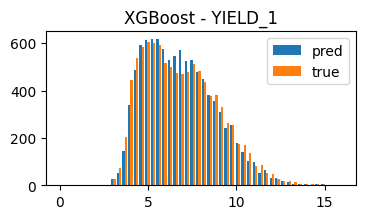

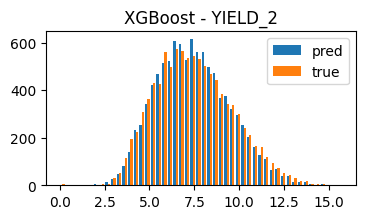

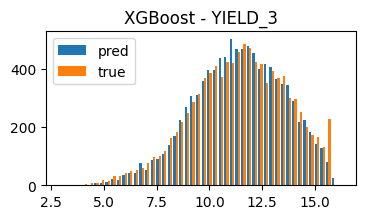

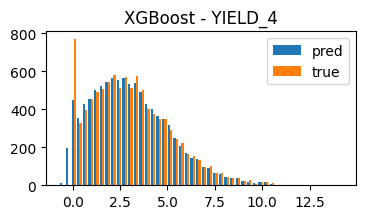

Mean SWD is : 0.10265474079363845


In [8]:
import xgboost as xgb

model_xgb= xgb.XGBRegressor()

# Train the model
model_xgb.fit(W, Y)

# Make predictions
pred_xgb = model_xgb.predict(W)

plot_yields_comparaison(pred_xgb, Y, 'XGBoost')

### d. NN

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = Sequential([
    Dense(64, activation='relu', input_shape=(72,)),
    Dense(64, activation='relu'),
    Dense(4)  # Output layer with 4 neurons for 4 target values
])

nn.compile(optimizer='adam', loss='mse')

nn.fit(W, Y, epochs=20, batch_size=32)

pred_nn = nn.predict(W)

# plot_yields_comparaison(pred_nn, Y, 'NN')

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 5.0562
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 2.8314
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 2.3083
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 2.0179
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8285
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7155
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 1.6797
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5724
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 1.5866
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5158
Epoch 11/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5219
Epoch 12/20
313/313 [==============================] - 1s 2ms/step - loss: 1.4951
Epoch 13/20
313/313 [====

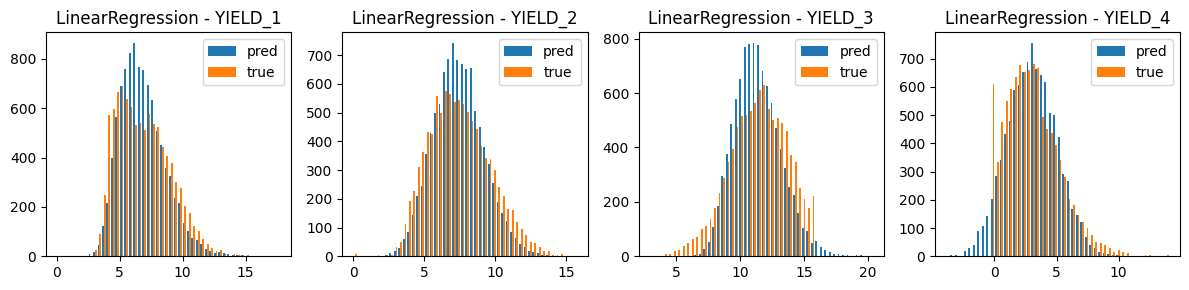

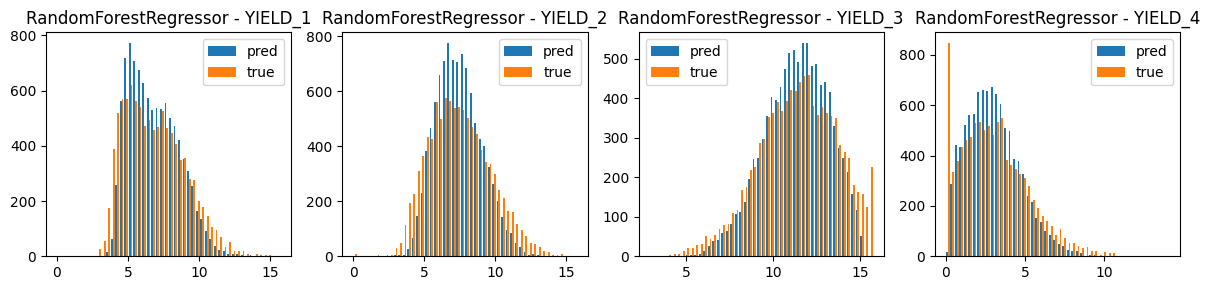

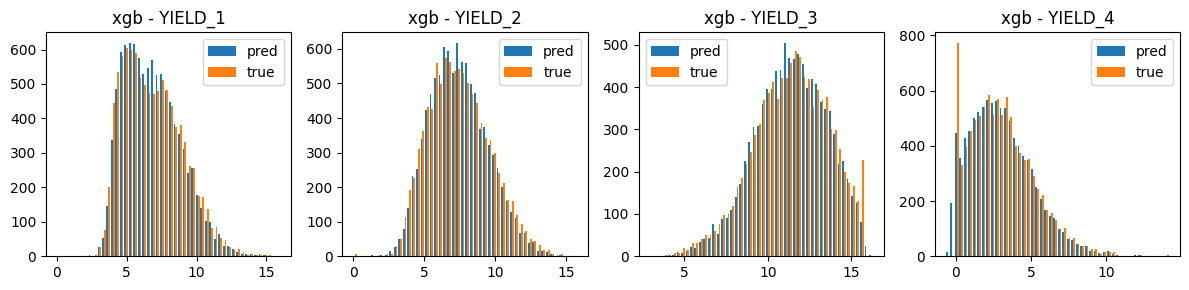

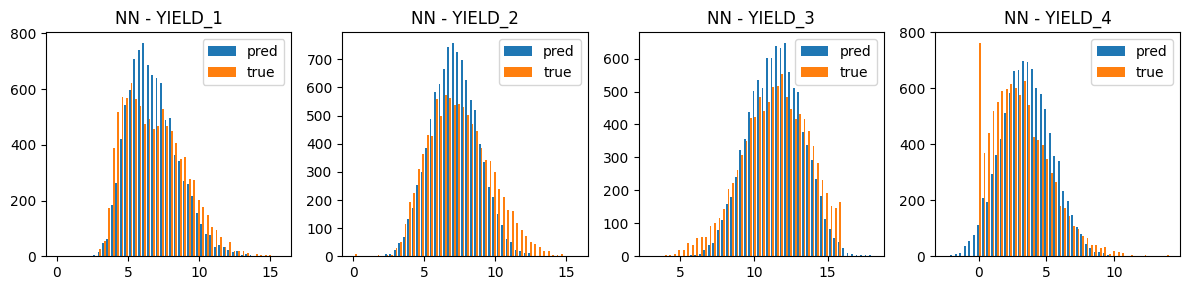

In [10]:
predictions = [pred_lr, pred_rf, pred_xgb, pred_nn]
method = ['LinearRegression', 'RandomForestRegressor', 'xgb', 'NN']

for idx, pred in enumerate(predictions):
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for i in range(4): 
        axs[i].hist([pred[:,i], Y[f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
        axs[i].set_title(f'{method[idx]} - YIELD_{i+1}')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

## 3. Define SWD 'weighted'

In [4]:
# Aff R and T to split in scenario 

def add_T_and_R(df:pd.DataFrame):
    df = df.copy()
    df["T"] = np.sum(df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                    'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                    'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                    'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                    ]], axis=1) / 36
    df["R"] = np.sum(df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                    'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                    ]], axis=1) / 12
    return df

full_df = join_station()
full_df_rt = add_T_and_R(full_df)
full_df_rt.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4,T,R
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97,22.404683,2.122557
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77,22.910263,1.443749
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65,23.096885,1.401006
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07,21.252078,1.563658
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40,23.344850,1.398759


In [5]:
# Create a dict to store scenario info 

import sys
sys.path.append('../')
from utils.scenario import subset_scenario

def create_dict_of_scenario(df):
    dict_scenario = {}
    for scenario in range(1, 10):
        sc = subset_scenario(df, scenario)
        print(sc.shape)
        W, y = get_train_test_data(sc)
        dict_scenario[scenario] = {"df" :sc,"W" :W,"y" :y}
    return dict_scenario

dict_scenario_9xgb = create_dict_of_scenario(full_df_rt)
# dict_scenario = {}
# for scenario in range(1, 10):
#     sc = subset_scenario(full_df_rt, scenario)
#     print(sc.shape)
#     W, y = get_train_test_data(sc)
#     dict_scenario[f'scenario_{scenario}'] = {"full_df_rt" :sc,
#                                              "W" :W,
#                                              "y" :y}

(464, 79)
(1290, 79)
(1678, 79)
(534, 79)
(1254, 79)
(1082, 79)
(1007, 79)
(1690, 79)
(1001, 79)


In [6]:
# Predict Y on each scenario 

import xgboost as xgb

for scenario in dict_scenario_9xgb.keys():
    W = dict_scenario_9xgb[scenario]["W"]
    y = dict_scenario_9xgb[scenario]["y"]
    model_xgb = xgb.XGBRegressor()
    model_xgb.fit(W, y)
    pred_xgb = model_xgb.predict(W)
    dict_scenario_9xgb[scenario]["pred"] = pred_xgb
    dict_scenario_9xgb[scenario]["model"] = model_xgb


In [7]:
# Compute the SW on each Scenario (i.e. on each Y and then mean it)

def compute_SWD_per_scenario(dct):
    for scenario in dct.keys():
        swds = []
        for i in range(4):
            y_pred = dct[scenario]["pred"][:,i]
            y_true = dct[scenario]["y"][[f'YIELD_{i+1}']]
            # @TODO: CHECK Pourquoi ?
            # Bizarre de devoir transformer en pandas puis en numpy
            # swd = ot.sliced_wasserstein_distance(pd.DataFrame(y_pred).to_numpy(), y_true.to_numpy())
            swd = ot.sliced_wasserstein_distance(y_pred[:, np.newaxis], y_true.to_numpy())
            
            swds.append(swd)
            dct[scenario][f'swd_{i+1}'] = swd
        dct[scenario]["mean_swd"] = np.mean(swds)
    
compute_SWD_per_scenario(dict_scenario_9xgb)

# for scenario in dict_scenario.keys():
#     swds = []
#     for i in range(4):
#         y_pred = dict_scenario[scenario]["pred"][:,i]
#         y_true = dict_scenario[scenario]["y"][[f'YIELD_{i+1}']]
#         # @TODO: CHECK Pourquoi ?
#         # Bizarre de devoir transformer en pandas puis en numpy
#         swd = ot.sliced_wasserstein_distance(pd.DataFrame(y_pred).to_numpy(), y_true.to_numpy())
#         swds.append(swd)
#         dict_scenario[scenario][f'swd_{i+1}'] = swd
#     dict_scenario[scenario]["mean_swd"] = np.mean(swds)

Mean SWD of 1 is: 0.0005064309963472553


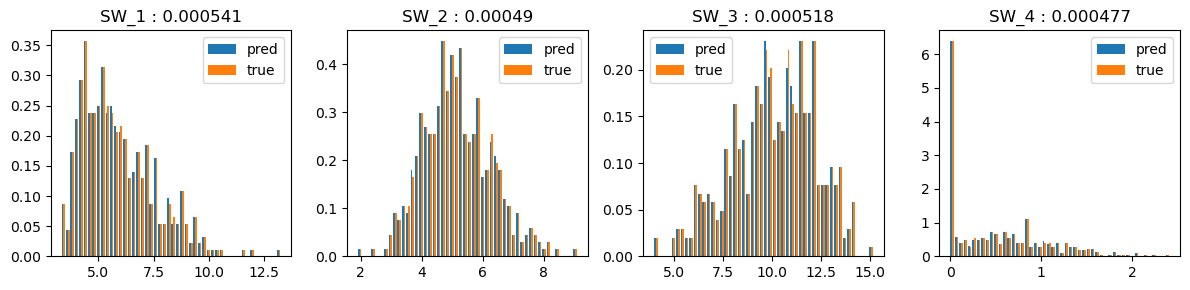

Mean SWD of 2 is: 0.006087601702443891


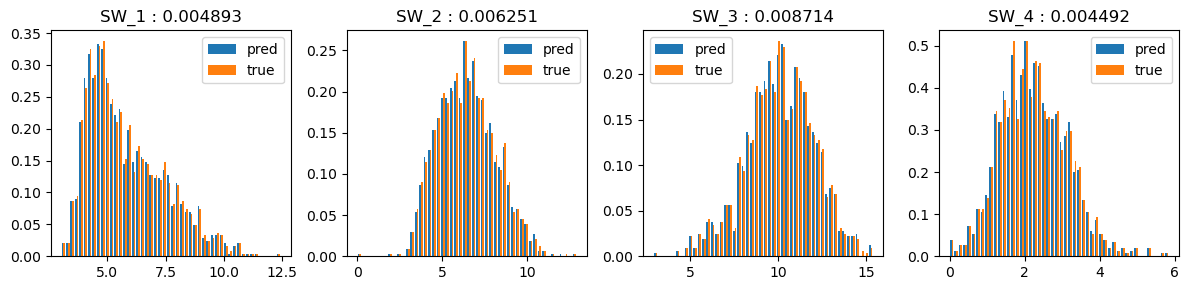

Mean SWD of 3 is: 0.011026291875820236


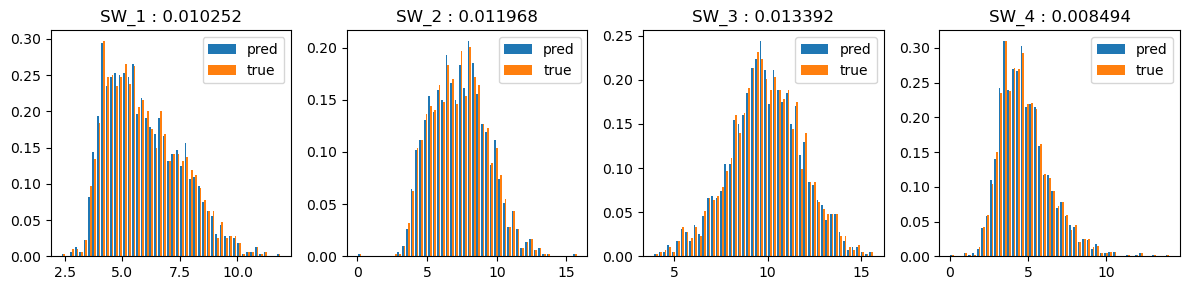

Mean SWD of 4 is: 0.0005253762143466431


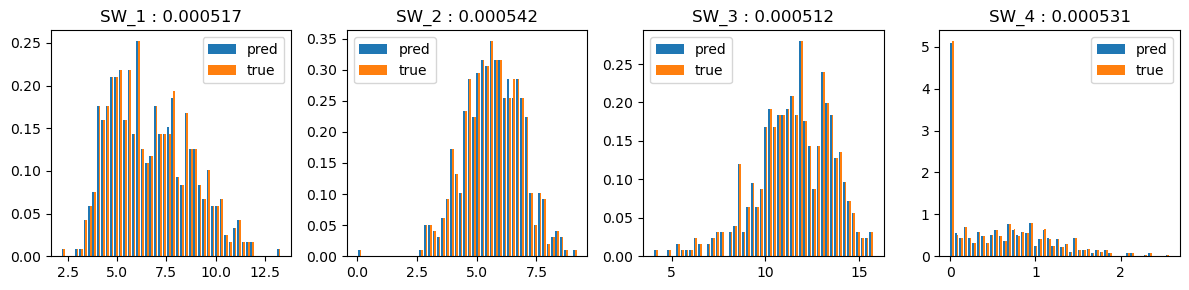

Mean SWD of 5 is: 0.005483593067277916


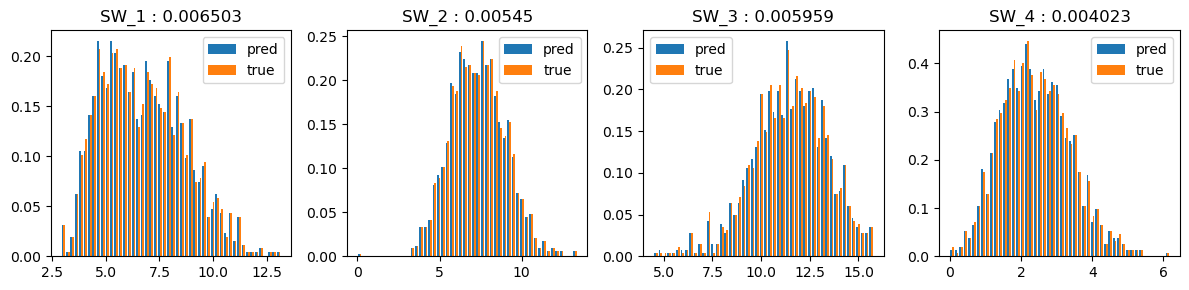

Mean SWD of 6 is: 0.005202499364642989


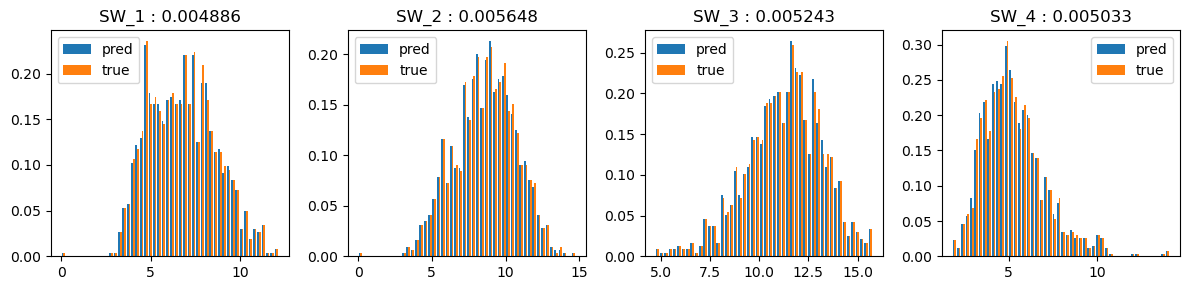

Mean SWD of 7 is: 0.003929762069419888


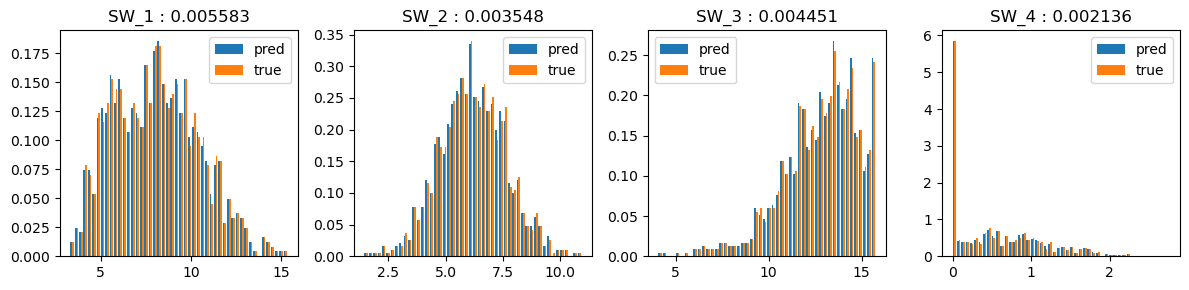

Mean SWD of 8 is: 0.010256025775946177


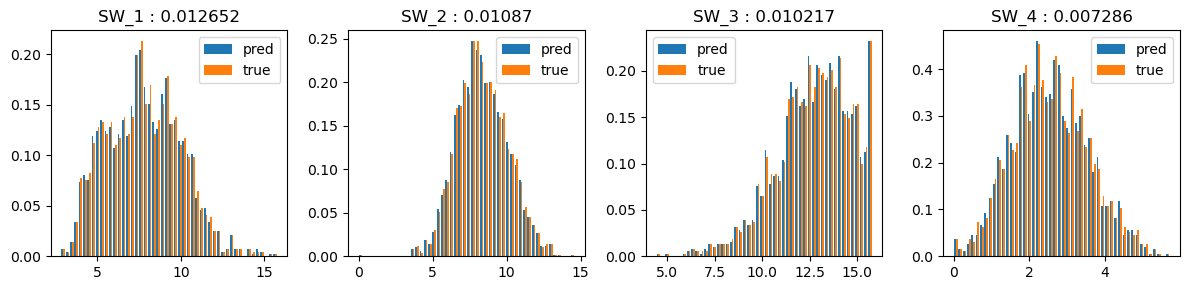

Mean SWD of 9 is: 0.0045555038779794875


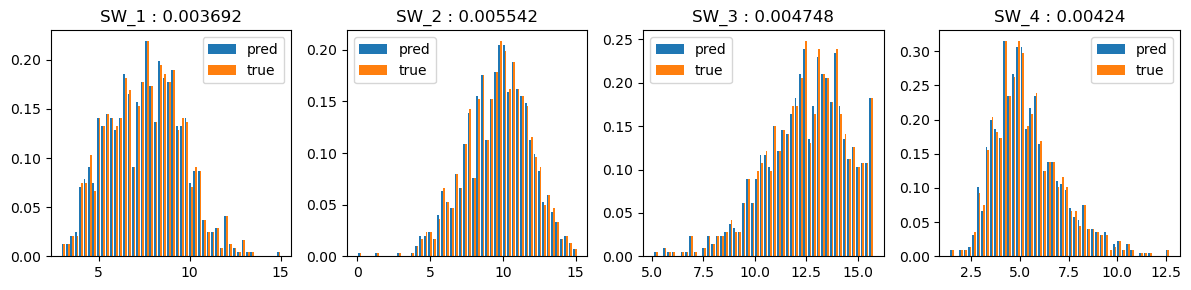

In [8]:
# Display the hist and the SWD for each scenario

def display_hist_SWD_per_scenario(dct):
    for scenario in dct.keys():
        print(f"Mean SWD of {scenario} is: {dct[scenario]['mean_swd']}")
        fig, axs = plt.subplots(1, 4, figsize=(12, 3))
        for i in range(4): 
            axs[i].hist([dct[scenario]["pred"][:,i], dct[scenario]["y"][f'YIELD_{i+1}']], label=['pred', 'true'], bins=50, density=True)
            axs[i].set_title(f'{scenario} - YIELD_{i+1}')
            axs[i].set_title(f'SW_{i+1} : {round(dct[scenario][f"swd_{i+1}"], 6)}')
            axs[i].legend()
        plt.tight_layout()
        plt.show()

display_hist_SWD_per_scenario(dict_scenario_9xgb)    

# for scenario in dict_scenario.keys():
#     print(f"Mean SWD of {scenario} is: {dict_scenario[scenario]['mean_swd']}")
#     fig, axs = plt.subplots(1, 4, figsize=(12, 3))
#     for i in range(4): 
#         axs[i].hist([dict_scenario[scenario]["pred"][:,i], dict_scenario[scenario]["y"][f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
#         axs[i].set_title(f'{scenario} - YIELD_{i+1}')
#         axs[i].set_title(f'SW_{i+1} : {round(dict_scenario[scenario][f"swd_{i+1}"], 6)}')
#         axs[i].legend()
#     plt.tight_layout()
#     plt.show()
    

In [30]:
# Compute the final loss

def compute_final_loss(df, dct, mean_key="mean_swd"):
    """
    df is the full dataframe
    dct is the dict of scenario
    """
    compute_SWD_per_scenario(dct)
    n_tot = 10_000
    loss = 0
    try:
        assert df.shape[0] == n_tot
        for scenario in dct.keys():
            swd = dct[scenario][mean_key]
            n = dct[scenario]["y"].shape[0]
            loss += (1 - n/n_tot) * swd
        print(f"The final SWD using weight is {loss}")
    except AssertionError:
        print("The first dimension of full_df is not equal to n_tot. Please check your data.")
    return loss

loss_9xgb = compute_final_loss(full_df, dict_scenario_9xgb)


# n_tot = 10_000
# loss = 0
# try:
#     assert full_df.shape[0] == n_tot
#     for scenario in dict_scenario.keys():
#         swd = dict_scenario[scenario]["mean_swd"]
#         n = dict_scenario[scenario]["y"].shape[0]
#         loss += (1 - n/n_tot) * swd
#     print(f"The final SWD using weight is {loss}")
# except AssertionError:
#     print("The first dimension of full_df is not equal to n_tot. Please check your data.")

The final SWD using weight is 0.0410504644231867


In [10]:
# 1 xgb pour toutes les données 
W, Y = get_train_test_data(full_df)

In [11]:
# Prediction

model_1xgb= xgb.XGBRegressor()

model_1xgb.fit(W, Y)

pred_xgb = model_1xgb.predict(W)
pred_columns = ["Ypred1", "Ypred2", "Ypred3", "Ypred4"]
pred_xgb = pd.DataFrame(pred_xgb, columns=pred_columns)

In [12]:
# To force the values between 0 and 15
pred_xgb = pred_xgb.applymap(lambda x: max(0, min(x, 15.75)))

In [13]:
pred_df = pd.concat([full_df_rt, pred_xgb], axis=1)

In [14]:
dict_scenario = {}
for scenario in range(1, 10):
    sc = subset_scenario(pred_df, scenario)
    W, y = get_train_test_data(sc)
    # y_pred = sc[pred_columns]
    y_pred = sc.iloc[:, -4:].to_numpy()
    dict_scenario[scenario] = {"df" :sc,
                                            "W" :W,
                                            "y" :y,
                                            "pred": y_pred}

dict_scenario_1xgb = dict_scenario.copy()

In [15]:
# Compute SWD

compute_SWD_per_scenario(dict_scenario_1xgb)

Mean SWD of 1 is: 0.10430486306989371


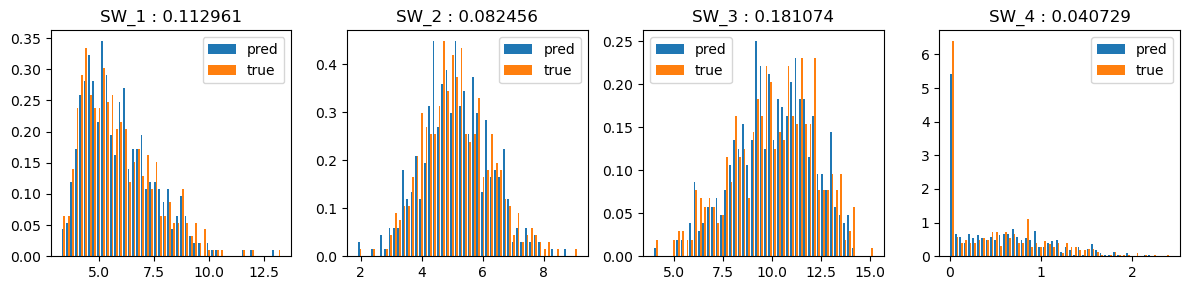

Mean SWD of 2 is: 0.11391478199829061


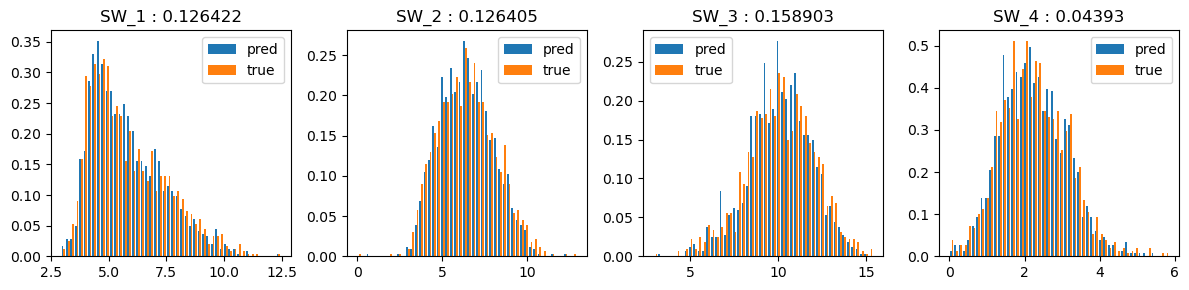

Mean SWD of 3 is: 0.11875245669927621


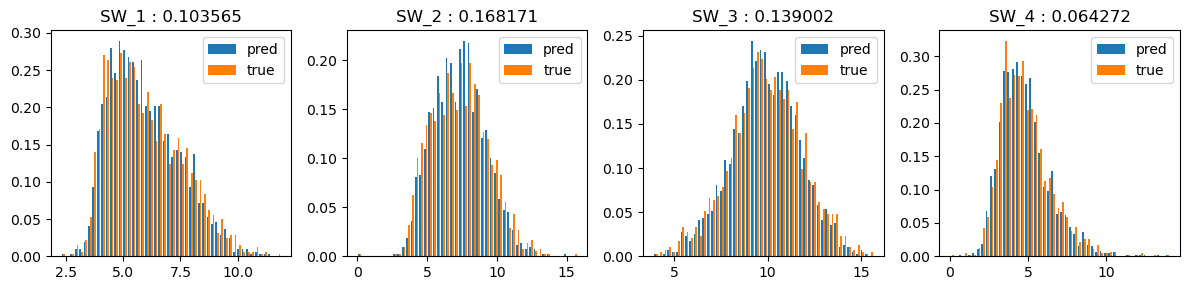

Mean SWD of 4 is: 0.11293689952902136


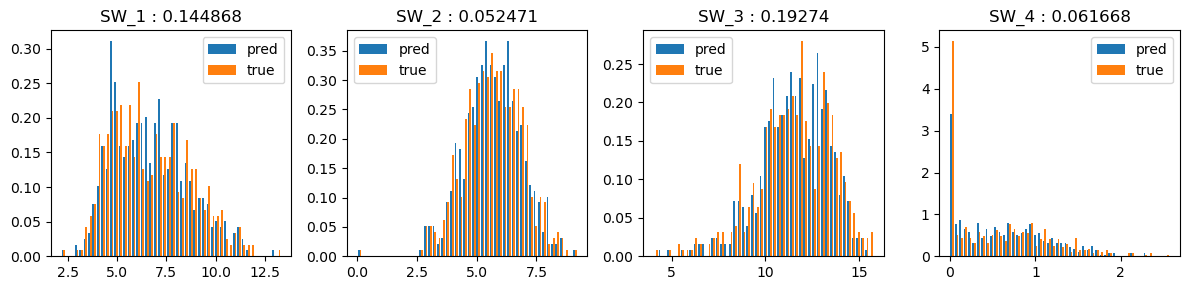

Mean SWD of 5 is: 0.1298597562123247


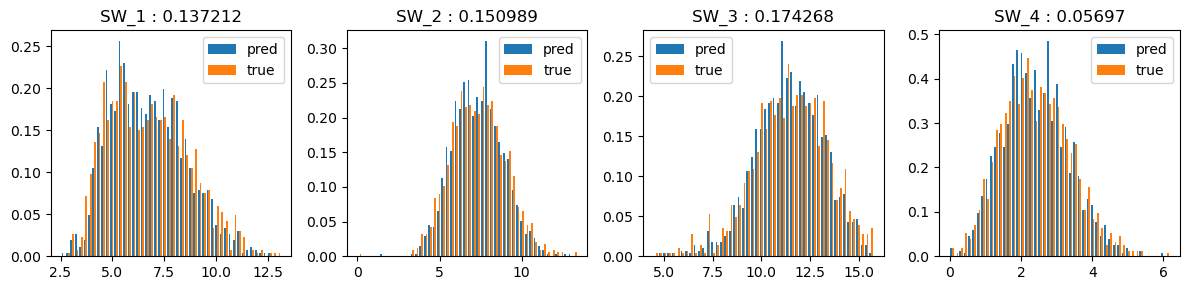

Mean SWD of 6 is: 0.13396503064450263


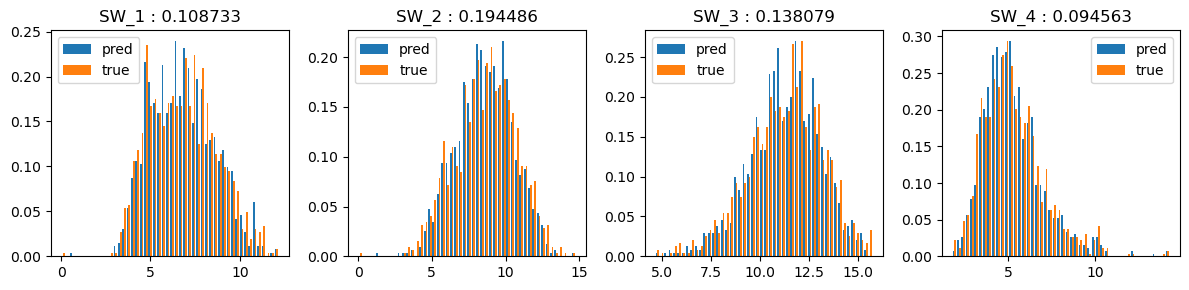

Mean SWD of 7 is: 0.11089155471143337


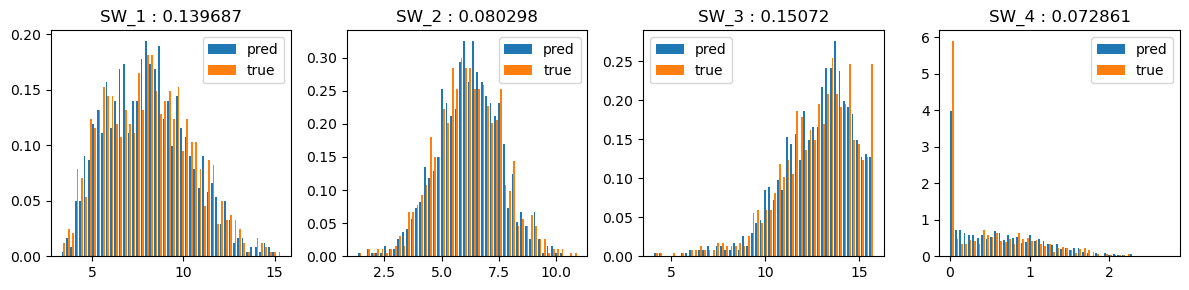

Mean SWD of 8 is: 0.12245977995360591


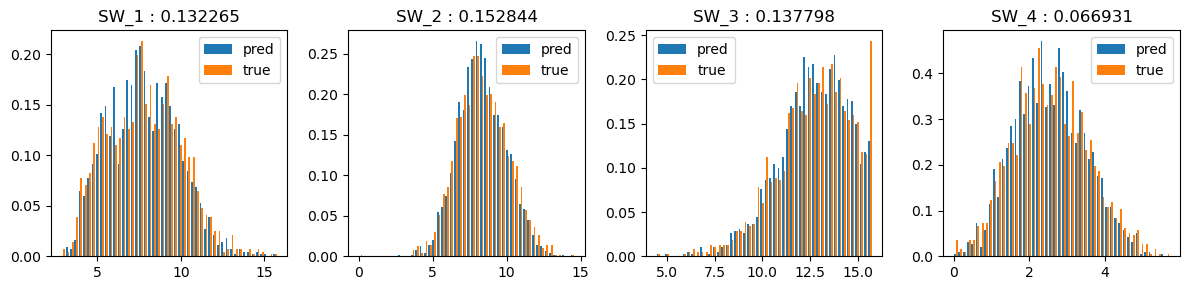

Mean SWD of 9 is: 0.13767457662076282


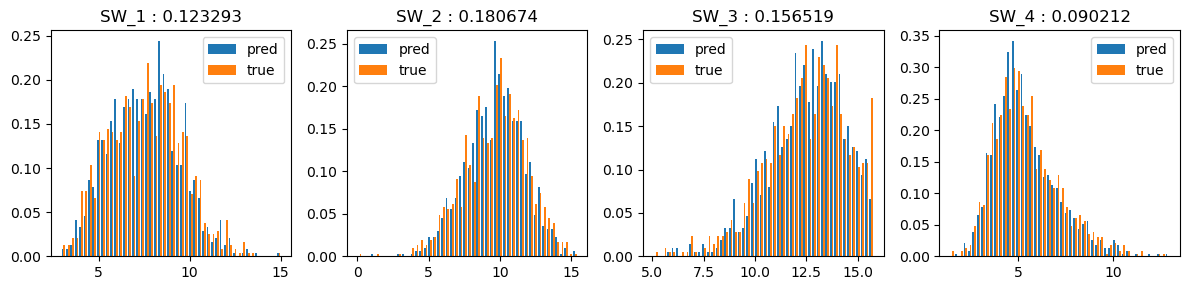

The final SWD using weight is 0.9628443170098008


In [16]:
# Display and loss

display_hist_SWD_per_scenario(dict_scenario_1xgb)  
loss_1xgb = compute_final_loss(full_df, dict_scenario_1xgb)

## 4. Define SWD as a loss => NOT working, it is only as a score

In [ ]:
from sklearn.metrics import make_scorer
import ot

# Create a scorer using the custom loss function
custom_scorer = make_scorer(ot.sliced.sliced_wasserstein_distance, greater_is_better=False)

## Take the W generated from csv

In [40]:
W_gen = pd.read_csv("../CSVs/W_synthe.csv")

# yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]
new_col_names = [f"W_{j}_{i}"  for i in range(1,5) for j in range(1, 19)] + ['T', 'R'] 

# W_gen_full = W_gen.reindex(columns=new_col_names + yields + ['T', 'R'] )
W_gen = W_gen.reindex(columns=new_col_names)# + ['T', 'R'] )

### With 9 XGB

In [41]:
# Generate the dict

dict_scenario = {}
for scenario in range(1, 10):
    sc = subset_scenario(W_gen, scenario)
    print(sc.shape)
    col_W = [colonne for colonne in sc.columns if colonne.startswith('W')]
    W = sc[col_W]
    dict_scenario[scenario] = {"df" :sc,
                                            "W" :W}
dict_scenario_gen = dict_scenario.copy()

(4318, 74)
(13440, 74)
(16548, 74)
(5411, 74)
(12667, 74)
(10986, 74)
(10016, 74)
(16215, 74)
(10399, 74)


In [42]:
# Prediction

for scenario in dict_scenario_gen.keys():
    W = dict_scenario_gen[scenario]["W"]
    model_xgb = dict_scenario_9xgb[scenario]["model"]
    pred_xgb = model_xgb.predict(W)
    # To force the values between 0 and 15
    # pred_xgb = pred_xgb.applymap(lambda x: max(0, min(x, 15.75)))
    pred_xgb = np.vectorize(lambda x: max(0, min(x, 15.75)))(pred_xgb)
    dict_scenario_gen[scenario]["y"] = dict_scenario_9xgb[scenario]["y"].copy()
    dict_scenario_gen[scenario]["pred"] = pred_xgb

The final SWD using weight is 3.810394196414056
Mean SWD of 1 is: 0.4176147917336363


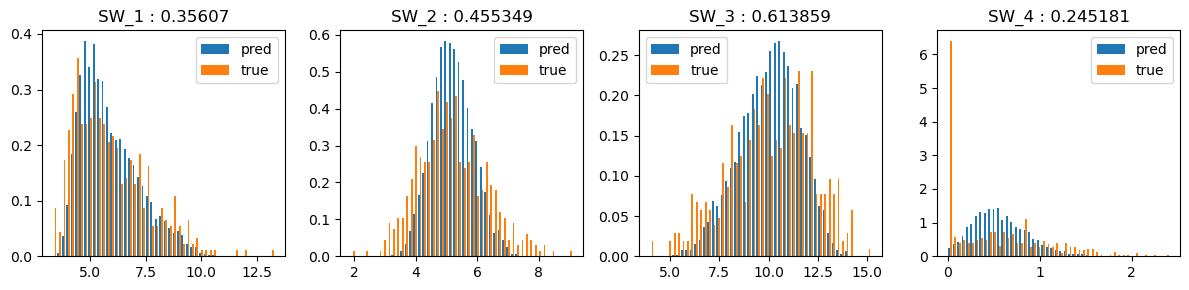

Mean SWD of 2 is: 0.40840941385715784


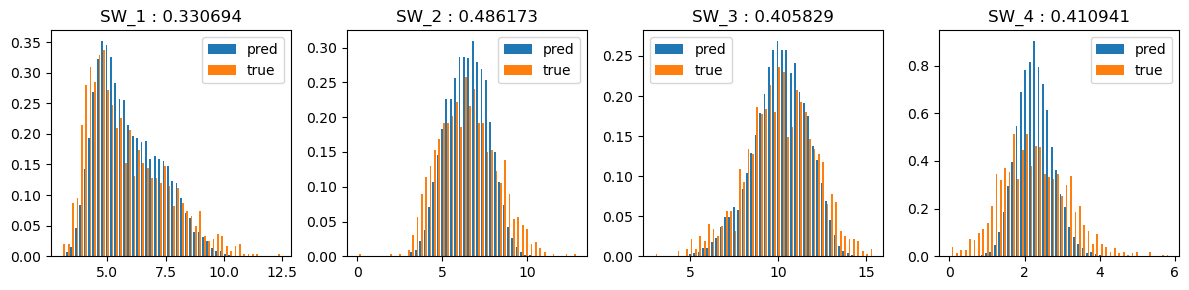

Mean SWD of 3 is: 0.47307913662973156


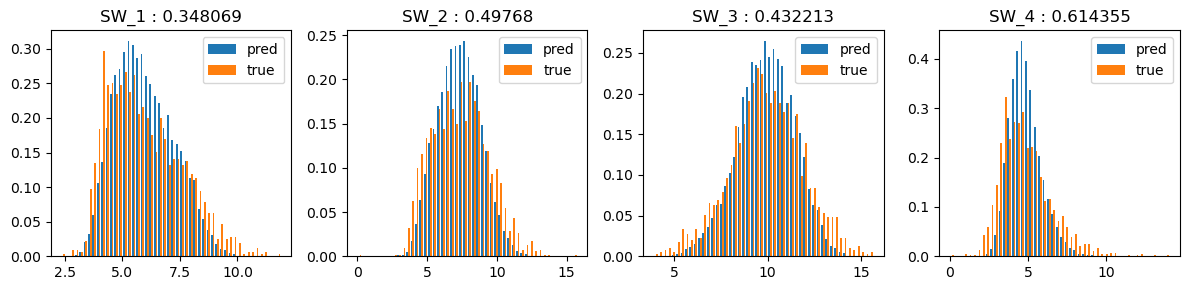

Mean SWD of 4 is: 0.47095767080764034


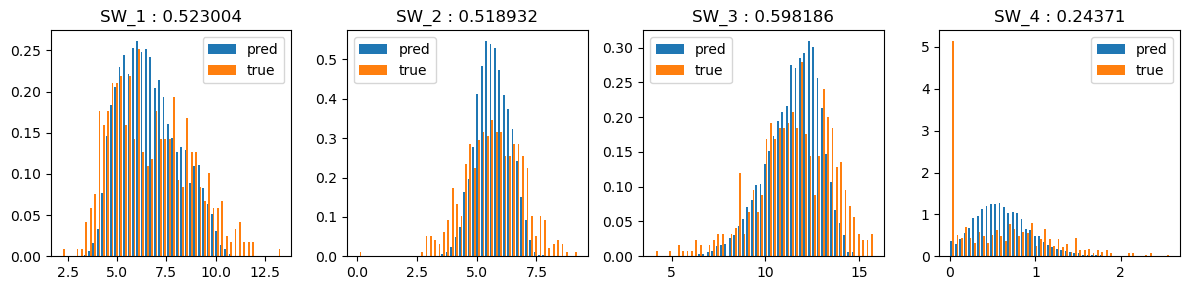

Mean SWD of 5 is: 0.44799048262045155


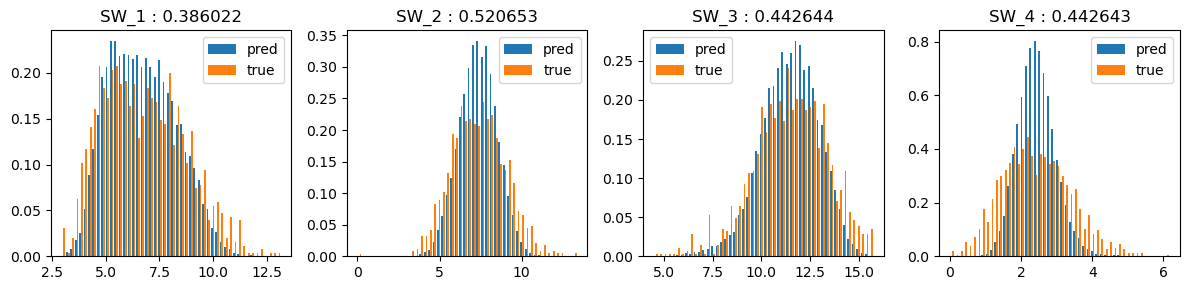

Mean SWD of 6 is: 0.5707353603136341


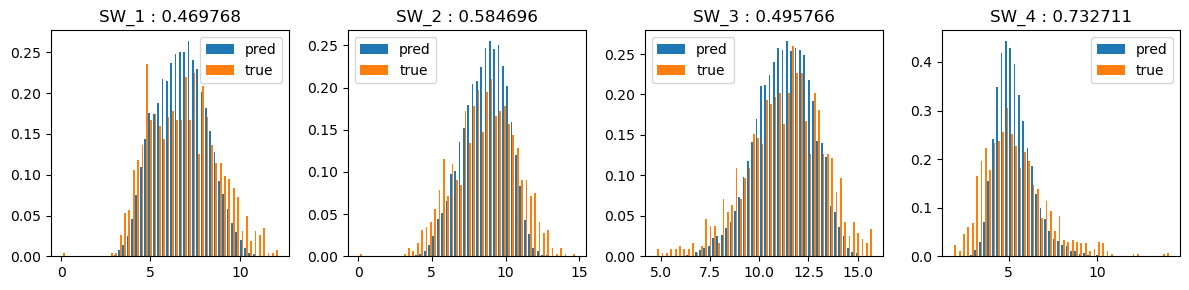

Mean SWD of 7 is: 0.45466402562358865


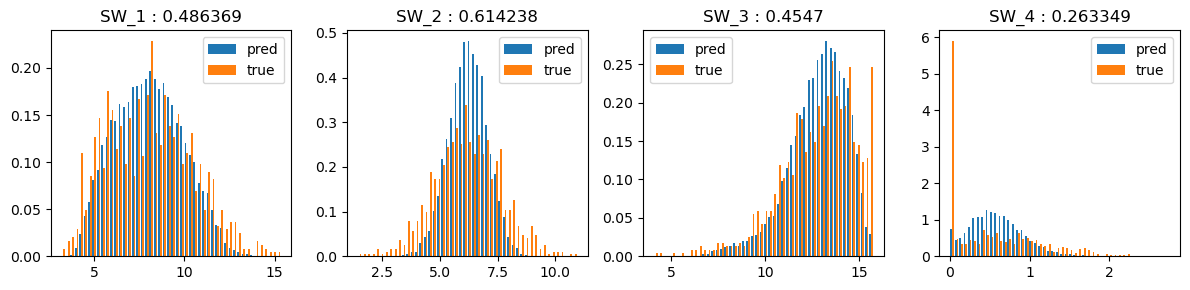

Mean SWD of 8 is: 0.4686085380682127


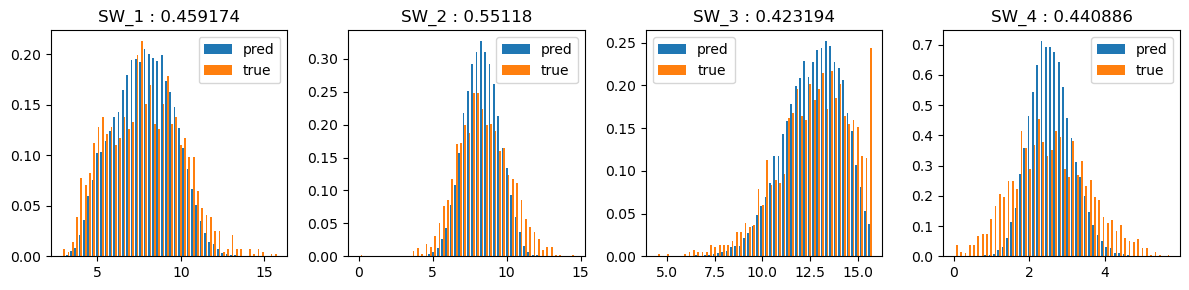

Mean SWD of 9 is: 0.5754415146704936


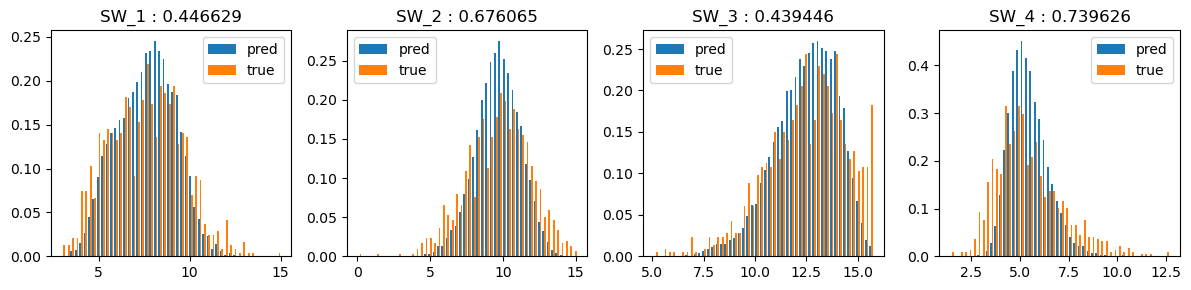

In [43]:
# Loss
loss_9xgb = compute_final_loss(full_df, dict_scenario_gen)
display_hist_SWD_per_scenario(dict_scenario_gen)

In [169]:
dict_scenario_gen[i]["df"].index

Int64Index([   13,    22,    38,    47,   140,   142,   171,   191,   203,
              233,
            ...
            99552, 99629, 99700, 99701, 99708, 99827, 99834, 99848, 99875,
            99984],
           dtype='int64', length=4318)

In [24]:
dict_scenario_9xgb[1]["y"]

,YIELD_1,YIELD_2,YIELD_3,YIELD_4
19,4.14,3.97,14.15,0.00
34,3.74,4.13,11.08,0.00
60,4.52,5.91,7.63,0.58
63,6.75,4.97,10.14,0.58
83,7.17,4.64,7.92,0.00
...,...,...,...,...
9901,4.41,7.53,9.27,0.84
9911,5.40,4.13,8.22,0.71
9982,6.34,4.93,9.22,0.76
9986,4.51,5.90,12.24,0.34


In [25]:
dict_scenario_gen[1]["pred"].shape

array([[ 4.5557275 ,  4.7093716 , 11.019061  ,  0.932565  ],
       [ 4.859277  ,  5.7821116 , 10.771979  ,  0.5327708 ],
       [ 8.246412  ,  5.590557  , 10.41206   ,  0.6563765 ],
       ...,
       [ 8.933407  ,  4.8098645 , 10.261514  ,  0.8861205 ],
       [ 6.612762  ,  6.085166  , 11.474672  ,  0.17627159],
       [ 6.9610023 ,  4.455835  ,  9.138491  ,  0.48491246]],
      dtype=float32)

In [29]:
# Calcul pour extraire des feature 
# @TODO:

for i in range(1,10):
    SWDs = []
    to_extract = len(dict_scenario_9xgb[i]["df"])
    for k in range(20):
        extract = np.random.choice(range(to_extract), to_extract, replace=False)
        array = dict_scenario_gen[i]["pred"][extract,:]
        SWDs.append(ot.sliced.sliced_wasserstein_distance(array, dict_scenario_9xgb[i]["y"].to_numpy()))
    print(i, np.mean(SWDs))
    dict_scenario_gen[i]["mean_swd_matt"] = np.mean(SWDs)

# ot.sliced.sliced_wasserstein_distance(pd.DataFrame(pred[:,i]).to_numpy(), Y[[f'YIELD_{i+1}']].to_numpy())

1 0.4127211648232897
2 0.43070330152350894
3 0.4991336883350602
4 0.474893161378058
5 0.465501079201956
6 0.5808963991872991
7 0.4848661843676667
8 0.46489620847337376
9 0.552164363424201


In [31]:
compute_final_loss(full_df ,dict_scenario_gen, "mean_swd_matt")

The final SWD using weight is 3.878058672549291


3.878058672549291

### With 1 XGB

In [33]:
W_gen.columns

Index(['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1', 'W_8_1',
       'W_9_1', 'W_10_1', 'W_11_1', 'W_12_1', 'W_13_1', 'W_14_1', 'W_15_1',
       'W_16_1', 'W_17_1', 'W_18_1', 'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2',
       'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2', 'W_10_2', 'W_11_2',
       'W_12_2', 'W_13_2', 'W_14_2', 'W_15_2', 'W_16_2', 'W_17_2', 'W_18_2',
       'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3', 'W_6_3', 'W_7_3', 'W_8_3',
       'W_9_3', 'W_10_3', 'W_11_3', 'W_12_3', 'W_13_3', 'W_14_3', 'W_15_3',
       'W_16_3', 'W_17_3', 'W_18_3', 'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4',
       'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4', 'W_10_4', 'W_11_4',
       'W_12_4', 'W_13_4', 'W_14_4', 'W_15_4', 'W_16_4', 'W_17_4', 'W_18_4',
       'T', 'R'],
      dtype='object')

In [35]:
# Prediction
W_1xgb = W_gen.drop(['T', 'R'], axis=1)
pred_1xgb = model_1xgb.predict(W_1xgb)
# To force the values between 0 and 15
# pred_xgb = pred_xgb.applymap(lambda x: max(0, min(x, 15.75)))
pred_1xgb = pd.DataFrame(pred_1xgb, columns=["Ypred1", "Ypred2", "Ypred3", "Ypred4"])
pred_1xgb = pred_1xgb.applymap(lambda x: max(0, min(x, 15.75)))

pred_df = pd.concat([full_df_rt, pred_1xgb], axis=1)

dict_scenario = {}
for scenario in range(1, 10):
    sc = subset_scenario(pred_df, scenario)
    col_W = [colonne for colonne in sc.columns if colonne.startswith('W')]
    W = sc[col_W]
    # y_pred = sc[pred_columns]
    y_pred = sc.iloc[:, -4:].to_numpy()
    y = dict_scenario_1xgb[scenario]["y"].copy()
    dict_scenario[scenario] = {"df" :sc,
                                            "W" :W,
                                            "y" :y,
                                            "pred": y_pred}

dict_scenario_1xgb_gen = dict_scenario.copy()

The final SWD using weight is 10.472431952470306
Mean SWD of 1 is: 2.017788467881668


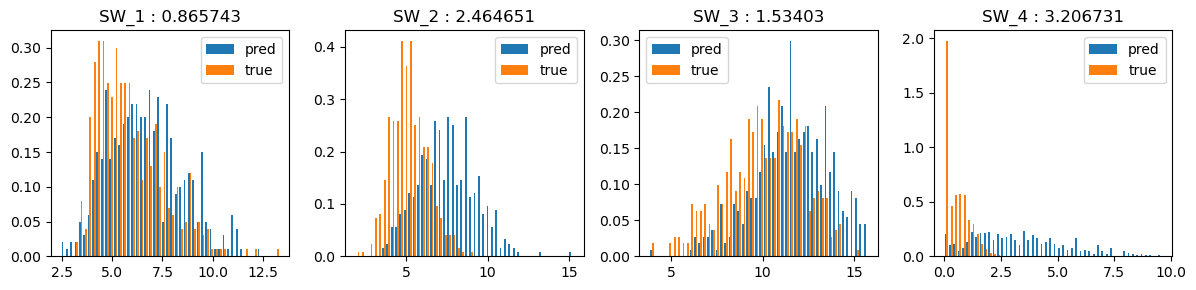

Mean SWD of 2 is: 1.2724958918393243


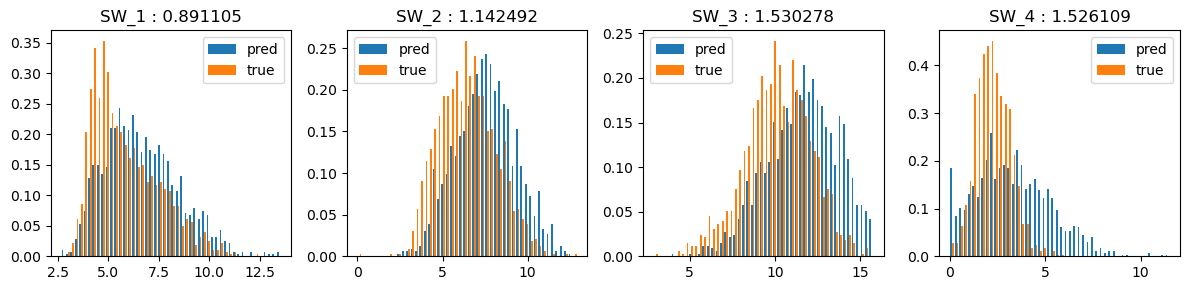

Mean SWD of 3 is: 1.1675572257683686


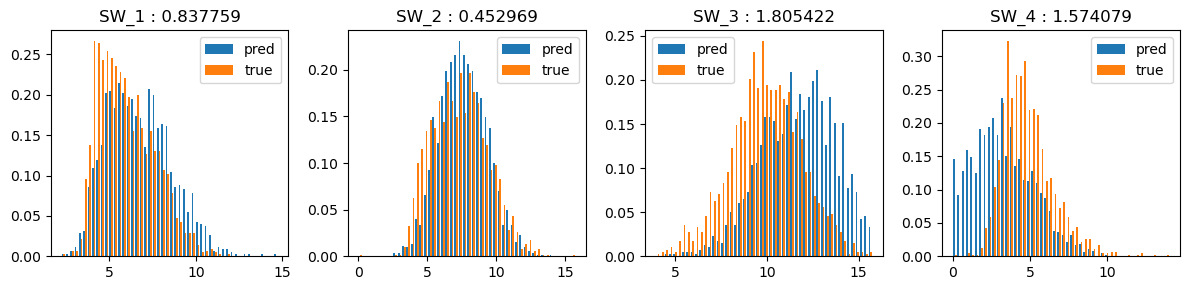

Mean SWD of 4 is: 1.4092463327395692


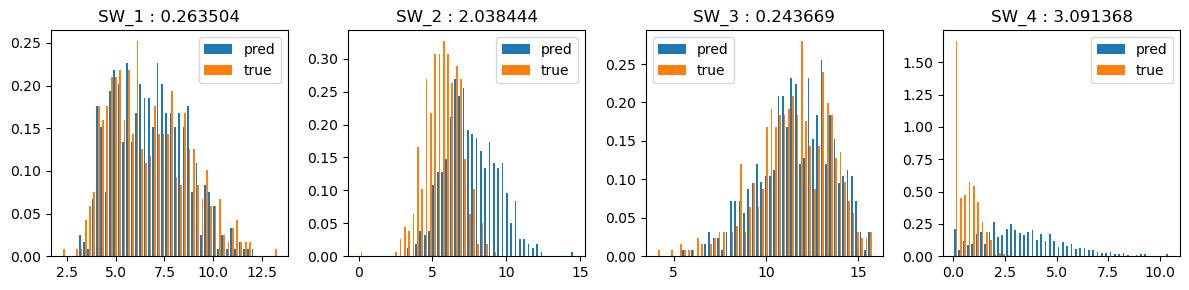

Mean SWD of 5 is: 0.5098169244809536


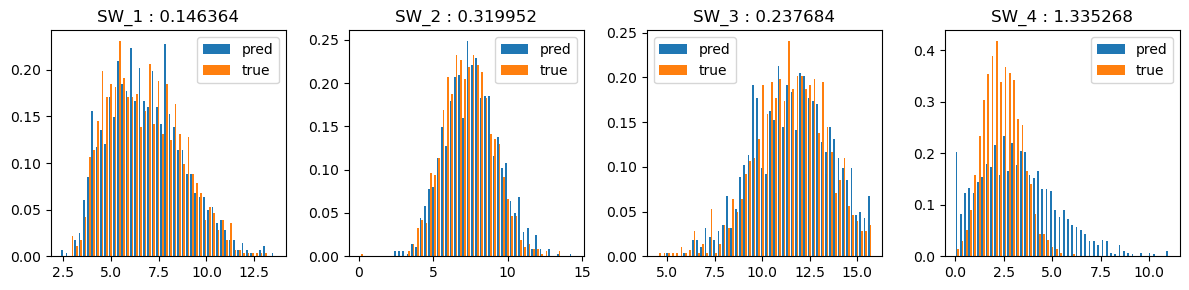

Mean SWD of 6 is: 0.9324212347838678


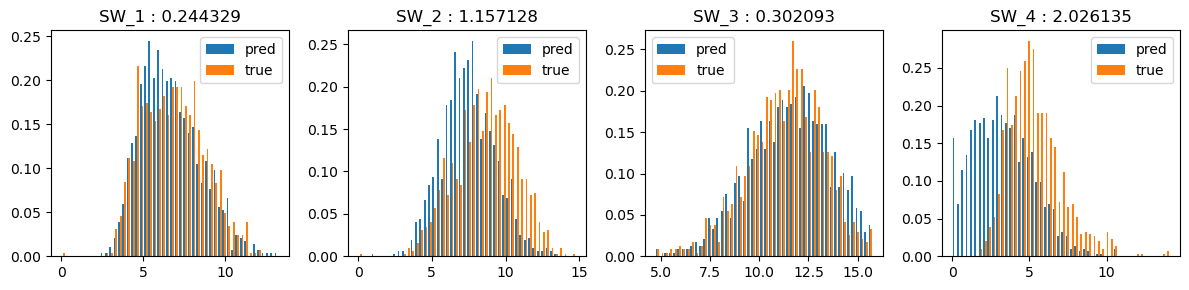

Mean SWD of 7 is: 1.784819768042101


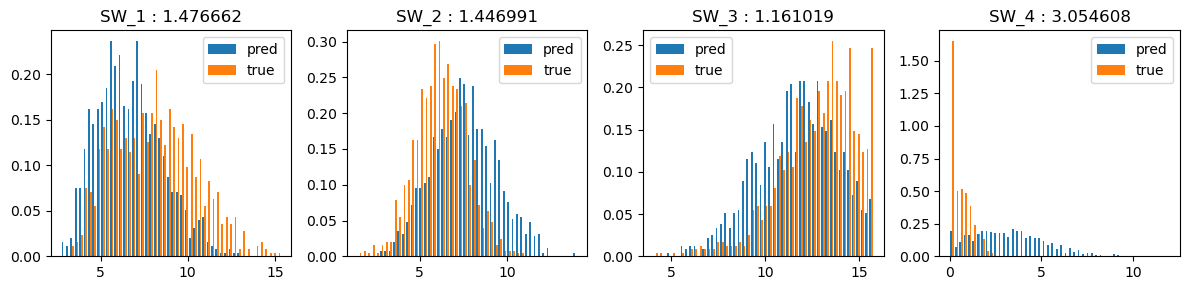

Mean SWD of 8 is: 1.0681671158119546


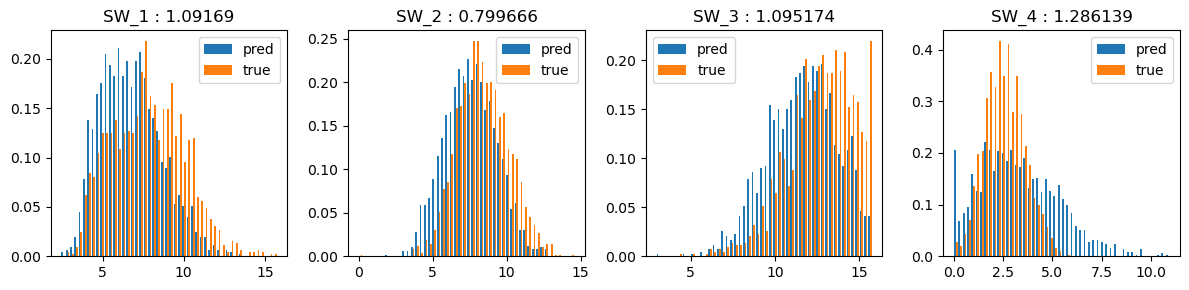

Mean SWD of 9 is: 1.5158760038663062


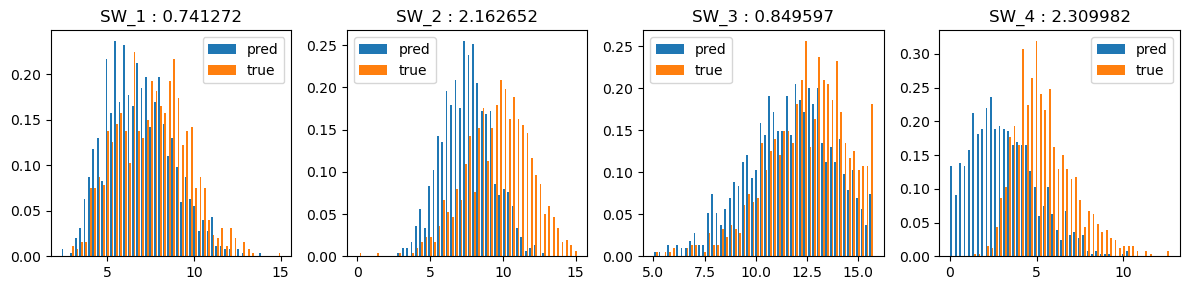

In [36]:
# Loss
loss_1xgb = compute_final_loss(full_df, dict_scenario_1xgb_gen)
display_hist_SWD_per_scenario(dict_scenario_1xgb_gen)

In [44]:
print('With 1 XGB:', loss_1xgb)
print('With 9 XGB:', loss_9xgb)

for scenario in dict_scenario_1xgb_gen.keys():
    print(scenario)
    print("\t 1XGB", dict_scenario_1xgb_gen[scenario]["mean_swd"])
    print("\t 9XGB", dict_scenario_gen[scenario]["mean_swd"])

With 1 XGB: 10.472431952470306
With 9 XGB: 3.810394196414056
1
	 1XGB 2.017788467881667
	 9XGB 0.4176147917336363
2
	 1XGB 1.2724958918393245
	 9XGB 0.40840941385715784
3
	 1XGB 1.1675572257683684
	 9XGB 0.47307913662973156
4
	 1XGB 1.4092463327395692
	 9XGB 0.47095767080764034
5
	 1XGB 0.5098169244809534
	 9XGB 0.44799048262045155
6
	 1XGB 0.9324212347838678
	 9XGB 0.5707353603136341
7
	 1XGB 1.784819768042101
	 9XGB 0.45466402562358865
8
	 1XGB 1.0681671158119548
	 9XGB 0.4686085380682127
9
	 1XGB 1.5158760038663062
	 9XGB 0.5754415146704936


In [38]:
for i in range(1,10):
    SWDs = []
    to_extract = len(dict_scenario_9xgb[i]["df"])
    for k in range(20):
        extract = np.random.choice(range(to_extract), to_extract, replace=False)
        array = dict_scenario_1xgb_gen[i]["pred"][extract,:]
        SWDs.append(ot.sliced.sliced_wasserstein_distance(array, dict_scenario_1xgb_gen[i]["y"].to_numpy()))
    print(i, np.mean(SWDs))
    dict_scenario_1xgb_gen[i]["mean_swd_matt"] = np.mean(SWDs)


1 2.1204759676931113
2 1.219238573551753
3 1.2791170288674198
4 1.8124293135217848
5 0.6208102147006314
6 1.1948929571876463
7 1.802772728737062
8 0.9724296861640347
9 1.6535944669831344


In [39]:
compute_final_loss(full_df ,dict_scenario_1xgb_gen, "mean_swd_matt")

The final SWD using weight is 11.390127857949706


11.390127857949706

## 5. Take the W generated by matt

In [17]:
yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]

new_col = []
figures = list(range(1, 19))
for j in figures:
    for i in range(1, 5):
        new_col.append(f"W_{j}_{i}" )
        
new_col_t = new_col + yields + ["T", "R"]
new_col_t.insert(0, "YEAR")
full_df_rt = full_df_rt[new_col_t]
full_df_rt.head()

,YEAR,W_1_1,W_1_2,W_1_3,W_1_4,W_2_1,W_2_2,W_2_3,W_2_4,W_3_1,...,W_18_1,W_18_2,W_18_3,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4,T,R
0,0,20.487164,18.325709,21.389266,16.086969,26.089329,24.840126,26.985066,24.245858,25.394672,...,0.886892,1.037317,2.680206,2.081787,6.37,10.51,10.32,5.97,22.404683,2.122557
1,1,21.430837,18.457140,21.314074,14.343275,22.228488,20.501430,22.516442,18.206660,24.205256,...,1.496904,1.818209,7.477726,3.214933,5.54,6.61,10.39,5.77,22.910263,1.443749
2,2,18.841767,16.874268,20.875083,14.787674,25.165941,22.280115,26.038845,21.581075,24.169267,...,0.682941,0.279352,2.659763,0.814444,4.39,6.86,8.49,8.65,23.096885,1.401006
3,3,18.359661,17.102786,20.553688,15.705925,20.235180,18.547797,20.992986,15.706772,22.714217,...,1.018326,1.468172,0.926442,0.870118,9.28,5.32,7.28,1.07,21.252078,1.563658
4,4,21.125963,19.693473,21.523342,16.394038,23.270596,20.145373,21.542900,15.535681,22.949896,...,1.938053,2.166599,1.708829,3.242242,8.86,6.32,7.31,7.40,23.344850,1.398759


In [18]:
W_full = full_df_rt[new_col]
W_full_ed = W_full.copy()
W_full_ed.loc[:, "W_10_1":] = np.sqrt(W_full.loc[:, "W_10_1":])

In [19]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, n_init=10)
gm.fit(W_full_ed)

GaussianMixture(n_components=10, n_init=10)

In [20]:
simul = gm.sample((len(W_full_ed)))[0]
simul = np.where(simul < 0, 0, simul)
ot.sliced.sliced_wasserstein_distance(W_full_ed.to_numpy(), simul)

0.029425827617958103

In [21]:
simul[:, 36:] = simul[:, 36:] ** 2

In [22]:
l = []
for i in range(30):
    l.append(ot.sliced.sliced_wasserstein_distance(W_full.to_numpy(), simul))
    
np.mean(l)

0.05658184312521602

In [1]:
!conda list numpy

# packages in environment at /Users/francois/anaconda3:
#
# Name                    Version                   Build  Channel
numpy                     1.23.5                   pypi_0    pypi
numpy-base                1.26.3          py311hb3ec012_0  
numpydoc                  1.5.0           py311hecd8cb5_0  


## Test

In [7]:
import numpy as np
SCENARIO_NUMBER = 2 # <- PICK A SCENARIO NUMBER BETWEEN 1 AND 9
noise = np.load("../data/noise.npy")
scenario = np.zeros((noise.shape[0], 9))
scenario[:, SCENARIO_NUMBER-1] = 1
scenario
np.argmax(scenario[0])+1

2

In [18]:
import numpy as np
a = np.zeros((4, 10))
a.shape[1]

10

In [2]:
!conda list scikit-learn

# packages in environment at /Users/francois/anaconda3:
#
# Name                    Version                   Build  Channel
scikit-learn              1.2.2           py311hcec6c5f_1  


In [1]:
from joblib import load

[load(f'../parameters/gmm_part2/model_{i}.joblib') for i in range(1,10)]

/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianMixture from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[GaussianMixture(n_components=7, n_init=30),
 GaussianMixture(n_components=8, n_init=30),
 GaussianMixture(n_components=10, n_init=30),
 GaussianMixture(n_components=6, n_init=30),
 GaussianMixture(n_components=10, n_init=30),
 GaussianMixture(n_components=9, n_init=30),
 GaussianMixture(n_components=10, n_init=30),
 GaussianMixture(n_components=10, n_init=30),
 GaussianMixture(n_components=8, n_init=30)]

In [12]:
# Avec les best models de mathieu n_proj=1000 2eme exec
scen = [0.087839654958864,0.05784588828619066,0.06181069026093355,0.09578490214821832,0.05834896018234551,0.07352681958720751,0.0768110958611427,0.055616001873879724,0.07777661621334561]
poids = [0.9536,0.871,0.8322,0.9466,0.8746,0.8918,0.8993,0.831,0.8999]

matt = [x*y for x, y in zip(scen,poids)]
matt



[0.08376389496877272,
 0.05038376869727206,
 0.0514388564351489,
 0.09066998837350346,
 0.05103200057547939,
 0.06557121770787167,
 0.06907621850792563,
 0.04621689755719405,
 0.06999117693038971]

In [13]:
# Avec les best models de mathieu n_proj=1000 2eme exec
scen = [0.09143632788528859, 0.05853140824524398,0.05873755965836656, 0.09330522693896265,0.05947479506764497, 0.0823569254040588,0.07821772845479488,0.05827702096912281,0.08500582691316756 ]

matt = [x*y for x, y in zip(scen,poids)]
matt

[0.0871936822714112,
 0.0509808565816075,
 0.04888139714769265,
 0.08832272782042204,
 0.052016655766162295,
 0.07344590607533964,
 0.07034120319939703,
 0.04842820442534105,
 0.0764967436391595]

In [14]:
# Avec les best models de mathieu n_proj=10000 
scen = [0.09299528176104573,0.0581162575319869,0.0583198494427361,0.09615961807452161,0.05923307501167121,0.07944762014492686,0.08023757492350941,0.06244287311876386,0.07447779479888456]
matt = [x*y for x, y in zip(scen,poids)]
matt

[0.08868030068733321,
 0.050619260310360584,
 0.048533778706244986,
 0.09102469446934217,
 0.051805247405207644,
 0.07085138764524578,
 0.07215765112871202,
 0.05189002756169277,
 0.06702256753951621]